# Portfolio Optimization Using DAX Stocks

In this project I'm going to import stock price data for stocks in the DAX 30, Germany's main stock exchange. I will compute common financial statistics, visualise these and perform mean-variance portfolio optimization.

First, import all the necessary libraries/modules:

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data
from datetime import datetime
import cvxopt as opt
from cvxopt import blas, solvers

In [12]:
# Define start and end date
start = datetime(2016, 1, 1)
end = datetime(2020, 1, 1)

# Create a list of ticker symbols of stocks in the DAX
dax_symbols = ['1COV', 'ADS', 'ALV', 'BAS', 'BAYN', 'BEI', 'BMW', 'CON', 'DAI', 'DB1', 'DBK', 'DPW', 'DTE', 'DWNI', 'EOAN', 
              'FME', 'FRE', 'HEI', 'HEN3', 'IFX', 'LIN', 'MRK', 'MTX', 'MUV2', 'RWE', 'SAP', 'SIE', 'VNA', 'VOW3', 'WDI']

In [52]:
# Create a list of symbols for which there are issues
list_to_drop = ['1COV', 'BAS', 'BMW', 'CON', 'DB1', 'DBK', 'DWNI', 'EOAN', 'FRE', 'FME', 'HEN3', 'MUV2', 'RWE', 'VNA', 'VOW3', 'WDI']

# Remove the symbols with issues from the list of symbols to analyse
dax_symbols_to_use = list(set(dax_symbols) - set(list_to_drop))
dax_symbols_to_use

['HEI',
 'DAI',
 'LIN',
 'MTX',
 'BAYN',
 'SIE',
 'IFX',
 'ALV',
 'DTE',
 'DPW',
 'MRK',
 'SAP',
 'BEI',
 'ADS']

In [53]:
stocks = data.DataReader(dax_symbols_to_use, data_source='yahoo', start=start, end=end)
stocks

Attributes   Adj Close                                                     \
Symbols            HEI    DAI         LIN        MTX    BAYN    SIE   IFX   
Date                                                                        
2015-12-31   27.566616  28.75   92.726379  45.183792  0.0300  0.010  0.38   
2016-01-04   27.444908  28.75   92.065338  42.760063  0.0300  0.010  0.38   
2016-01-05   28.195435  28.75   91.748398  42.257584  0.0300  0.015  0.38   
2016-01-06   28.352638  28.75   90.824760  40.888069  0.0300  0.015  0.38   
2016-01-07   28.073729  28.75   88.551895  39.124466  0.0300  0.025  0.38   
...                ...    ...         ...        ...     ...    ...   ...   
2019-12-24  116.953484    NaN  209.640076  57.482224  0.0147    NaN   NaN   
2019-12-26  115.324554    NaN  210.759506  57.532127  0.0147    NaN   NaN   
2019-12-27  115.014748    NaN  210.274078  57.142860  0.0147    NaN   NaN   
2019-12-30  114.105347    NaN  209.511307  57.552094  0.0147    NaN   NaN   
2019-12-31  114.075371    NaN  210.908096  57.522152  0.0147    NaN   NaN   

Attributes                                 ... Volume                    \
Symbols           ALV         DTE     DPW  ...   BAYN       SIE     IFX   
Date                                       ...                            
2015-12-31  78.265289   68.013077  432.00  ...    0.0    4200.0  3500.0   
2016-01-04  76.295631   67.122520  464.00  ...    0.0       0.0     0.0   
2016-01-05  73.924538   67.809532  464.00  ...    0.0    5500.0     0.0   
2016-01-06  72.350082   67.504196  480.00  ...    0.0   34250.0     0.0   
2016-01-07  69.909958   66.766312  472.00  ...    0.0  396050.0     0.0   
...               ...         ...     ...  ...    ...       ...     ...   
2019-12-24  83.689018  125.513458    1.23  ...    0.0       NaN     NaN   
2019-12-26  83.846039  125.895401    1.20  ...    0.0       NaN     NaN   
2019-12-27  84.120811  126.218597    1.19  ...    0.0       NaN     NaN   
2019-12-30  83.090401  126.355705    1.19  ...    0.0       NaN     NaN   
2019-12-31  82.835251  127.188141    1.19  ...    0.0       NaN     NaN   

Attributes                                                               \
Symbols          ALV        DTE       DPW         MRK        SAP    BEI   
Date                                                                      
2015-12-31  283700.0   979900.0       0.0   8292900.0   267900.0    0.0   
2016-01-04  563500.0  1408300.0       0.0  17174600.0  1075400.0  211.0   
2016-01-05  640200.0  1259100.0       0.0  11075500.0  1392000.0    0.0   
2016-01-06  521000.0  2098600.0       0.0  12465900.0  1031600.0    0.0   
2016-01-07  743100.0  1421400.0       0.0  12720000.0  1670200.0  360.0   
...              ...        ...       ...         ...        ...    ...   
2019-12-24   69700.0   340100.0  246700.0   2235900.0   117900.0    NaN   
2019-12-26   83400.0   602300.0  141100.0   2922400.0   170000.0    NaN   
2019-12-27  270100.0   695200.0   72000.0   3586800.0   357200.0    NaN   
2019-12-30  203100.0  1364400.0       0.0   3752800.0   257200.0    NaN   
2019-12-31  166300.0   837800.0       0.0   4495000.0   299300.0    NaN   

Attributes            
Symbols          ADS  
Date                  
2015-12-31  267000.0  
2016-01-04  477400.0  
2016-01-05  363000.0  
2016-01-06  514300.0  
2016-01-07  605100.0  
...              ...  
2019-12-24  189200.0  
2019-12-26  438100.0  
2019-12-27  465900.0  
2019-12-30  475200.0  
2019-12-31  602600.0  

[1007 rows x 84 columns]

In [1]:
# Get the adjusted closing prices
closing_prices = stocks['Adj Close']
closing_prices

NameError: name 'stocks' is not defined

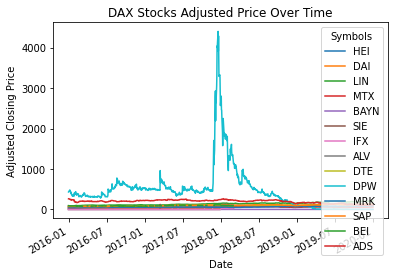

In [64]:
# Plot the price movements over the selecte dtime period
closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("DAX Stocks Adjusted Price Over Time")
plt.show()

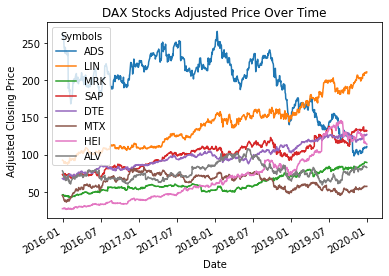

In [63]:
# List of stocks to keep in the analysis
include = ['ADS', 'LIN', 'MRK', 'SAP', 'DTE', 'MTX', 'HEI', 'ALV']

# Run the plot again
closing_prices[include].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("DAX Stocks Adjusted Price Over Time")
plt.show()

In [66]:
final_dax_stocks = closing_prices[include]

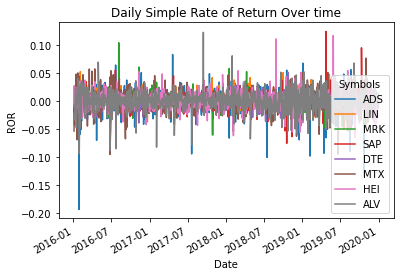

In [168]:
# Calculate daily simple rate of return and plot the result
daily_ror = final_dax_stocks.pct_change()
selected = list(final_dax_stocks.columns[1:])
daily_ror2 = final_dax_stocks[selected].pct_change()
daily_ror.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.show()

In [77]:
# Caluclate the average daily returns for the 8 companies
avg_ror = daily_ror.mean()

# Sort from highest to lowest
avg_ror.sort_values(inplace=True, ascending=False)
avg_ror

Symbols
HEI    0.001526
LIN    0.000892
MRK    0.000729
SAP    0.000676
DTE    0.000668
MTX    0.000415
ALV    0.000228
ADS   -0.000658
dtype: float64

In [78]:
# Extract the keys
labels = avg_ror.keys()
labels

Index(['HEI', 'LIN', 'MRK', 'SAP', 'DTE', 'MTX', 'ALV', 'ADS'], dtype='object', name='Symbols')

In [79]:
# Get the heights for the bars
height = []
for key in labels:
    height.append(avg_ror[key])
height

[0.001526449304929263,
 0.0008924932949586872,
 0.0007288501646126674,
 0.0006757194762476671,
 0.0006675906654308819,
 0.0004149910976515193,
 0.00022812211388226482,
 -0.0006575791566321612]

In [80]:
# Obtain x-axis positions
x_pos = np.arange(len(labels))
x_pos

array([0, 1, 2, 3, 4, 5, 6, 7])

Text(0.5, 1.0, 'Average daily rate of return for 8 German stocks')

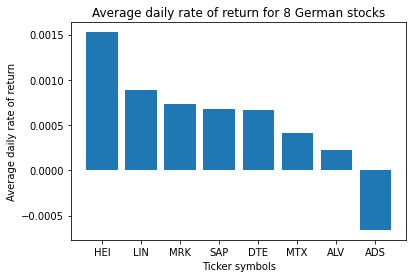

In [81]:
# Create bar chart for the average daily returns
plt.bar(x_pos, height)

# Add ticks, axis labels, etc.
plt.xticks(x_pos, labels)
plt.xlabel('Ticker symbols')
plt.ylabel('Average daily rate of return')
plt.title('Average daily rate of return for 8 German stocks')

In [82]:
# Calculate a covariance matrix between the different stock returns
cov_matrix = daily_ror.cov()
cov_matrix

Symbols,ADS,LIN,MRK,SAP,DTE,MTX,HEI,ALV
Symbols,,,,,,,,
ADS,0.000387,0.000074,0.000055,0.000078,-0.000001,0.000140,0.000069,0.000121
LIN,0.000074,0.000151,0.000046,0.000066,0.000011,0.000107,0.000050,0.000080
MRK,0.000055,0.000046,0.000141,0.000045,0.000019,0.000058,0.000039,0.000022
SAP,0.000078,0.000066,0.000045,0.000187,0.000010,0.000083,0.000057,0.000088
DTE,-0.000001,0.000011,0.000019,0.000010,0.000090,0.000002,0.000007,-0.000005
MTX,0.000140,0.000107,0.000058,0.000083,0.000002,0.000349,0.000092,0.000148
HEI,0.000069,0.000050,0.000039,0.000057,0.000007,0.000092,0.000229,0.000045
ALV,0.000121,0.000080,0.000022,0.000088,-0.000005,0.000148,0.000045,0.000342


In [84]:
# Alos have a look at correlation
corr_matrix = daily_ror.corr()
corr_matrix

Symbols,ADS,LIN,MRK,SAP,DTE,MTX,HEI,ALV
Symbols,,,,,,,,
ADS,1.000000,0.304409,0.234188,0.290456,-0.005674,0.379978,0.233537,0.332066
LIN,0.304409,1.000000,0.317460,0.391274,0.094753,0.465069,0.268206,0.351699
MRK,0.234188,0.317460,1.000000,0.275980,0.171511,0.262766,0.215331,0.101152
SAP,0.290456,0.391274,0.275980,1.000000,0.079154,0.323152,0.274905,0.345584
DTE,-0.005674,0.094753,0.171511,0.079154,1.000000,0.008868,0.046863,-0.029249
MTX,0.379978,0.465069,0.262766,0.323152,0.008868,1.000000,0.326779,0.427235
HEI,0.233537,0.268206,0.215331,0.274905,0.046863,0.326779,1.000000,0.159070
ALV,0.332066,0.351699,0.101152,0.345584,-0.029249,0.427235,0.159070,1.000000


In [128]:
# Define function to generate random portfolios based on expected returns and a covariance matrix
def return_portfolios(expected_returns, cov_matrix, num_portfolios):
    port_returns = []
    port_volatility = []
    stock_weights = []
    # Select the ticker symbols that the expected returns belong to
    selected = (expected_returns.axes)[0]
    # Set number of assets and portfolios
    num_assets = len(selected) 
    num_portfolios = num_portfolios
    
    # For each portfolio, assign random weights, assure that they sum to 1, obtain the portfolio return and volatility
    # and append the results
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    # Initiate a portfolio dictionary
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    # Loop through the stocks in the portflio and assign their weighst to the portfolio dictionary
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    # Transform the dictionary to a DataFrame
    df = pd.DataFrame(portfolio)
    
    # Make sure that the column order is the way we want it
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df

In [129]:
# Inspect what the df would look like for 10 randomly generated portfolios
df = return_portfolios(avg_ror, cov_matrix, 10)
df

,Returns,Volatility,HEI Weight,LIN Weight,MRK Weight,SAP Weight,DTE Weight,MTX Weight,ALV Weight,ADS Weight
0,0.000541,0.009256,0.050912,0.163683,0.153091,0.116312,0.090546,0.214194,0.131471,0.079793
1,0.000649,0.008524,0.047780,0.180608,0.203474,0.102672,0.207793,0.208735,0.004092,0.044845
2,0.000717,0.010175,0.278603,0.292974,0.022914,0.013590,0.106269,0.032967,0.097353,0.155330
3,0.000566,0.008765,0.034540,0.063970,0.215420,0.251888,0.125904,0.172276,0.071391,0.064611
4,0.000635,0.009378,0.129964,0.159449,0.174472,0.033451,0.110826,0.214501,0.111212,0.066125
5,0.000475,0.008412,0.104292,0.115627,0.188390,0.080202,0.128371,0.000365,0.210546,0.172206
6,0.000598,0.009340,0.120956,0.100642,0.202177,0.157213,0.032613,0.134095,0.178547,0.073757
7,0.000705,0.008535,0.124852,0.192181,0.097450,0.150513,0.199879,0.144280,0.041340,0.049506
8,0.000523,0.008102,0.112371,0.069680,0.052036,0.074034,0.272448,0.046051,0.277485,0.095895
9,0.000526,0.009454,0.153223,0.062287,0.044604,0.154254,0.142055,0.155890,0.145764,0.141923


Text(0.5, 1.0, 'Risk vs. Return for 5000 Random Portfolios')

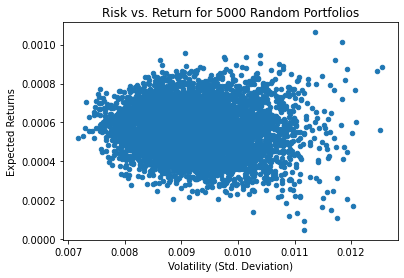

In [130]:
# Obtain and plot 5000 random portfolios
rand_portfolios = return_portfolios(avg_ror, cov_matrix, 5000)

rand_portfolios.plot.scatter(x='Volatility', y='Returns')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Risk vs. Return for 5000 Random Portfolios')

In [180]:
# Define function to return the efficient frontier given a set of returns and number of optimal portfolios
def optimal_portfolio(returns, num_portfolios):
    # Obtain number of stocks in the portfolio
    n = returns.shape[1]
    # Convert DataFrame to matrix and transpose the matrix (this leaves dates as columns and stock tickers as rows)
    returns = np.transpose(returns.to_numpy())

    N = num_portfolios
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

In [181]:
weights, returns, risks = optimal_portfolio(daily_ror2[1:], 500)

     pcost       dcost       gap    pres   dres
 0: -7.3078e-04 -1.0015e+00  1e+00  2e-16  3e+00
 1: -7.3107e-04 -1.1523e-02  1e-02  1e-16  3e-02
 2: -7.5734e-04 -1.6223e-03  9e-04  9e-17  3e-03
 3: -1.4465e-03 -2.0072e-03  6e-04  2e-16  1e-03
 4: -1.5063e-03 -1.5199e-03  1e-05  1e-16  2e-05
 5: -1.5149e-03 -1.5151e-03  1e-07  1e-16  2e-07
 6: -1.5150e-03 -1.5150e-03  1e-09  1e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.3070e-04 -1.0015e+00  1e+00  4e-16  3e+00
 1: -7.3099e-04 -1.1523e-02  1e-02  9e-17  3e-02
 2: -7.5725e-04 -1.6222e-03  9e-04  5e-17  3e-03
 3: -1.4464e-03 -2.0070e-03  6e-04  2e-16  1e-03
 4: -1.5061e-03 -1.5197e-03  1e-05  1e-16  2e-05
 5: -1.5147e-03 -1.5148e-03  1e-07  1e-16  2e-07
 6: -1.5147e-03 -1.5147e-03  1e-09  7e-21  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.3061e-04 -1.0015e+00  1e+00  0e+00  3e+00
 1: -7.3090e-04 -1.1523e-02  1e-02  6e-17  3e-02
 2: -7.5717e-04 -1.6221e

 4: -1.4984e-03 -1.5115e-03  1e-05  1e-16  2e-05
 5: -1.5065e-03 -1.5066e-03  1e-07  1e-16  2e-07
 6: -1.5066e-03 -1.5066e-03  1e-09  1e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2791e-04 -1.0015e+00  1e+00  4e-16  3e+00
 1: -7.2820e-04 -1.1520e-02  1e-02  2e-16  3e-02
 2: -7.5454e-04 -1.6191e-03  9e-04  7e-17  3e-03
 3: -1.4426e-03 -2.0018e-03  6e-04  3e-16  9e-04
 4: -1.4979e-03 -1.5111e-03  1e-05  2e-16  2e-05
 5: -1.5060e-03 -1.5061e-03  1e-07  5e-19  2e-07
 6: -1.5061e-03 -1.5061e-03  1e-09  1e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2775e-04 -1.0015e+00  1e+00  0e+00  3e+00
 1: -7.2805e-04 -1.1520e-02  1e-02  2e-16  3e-02
 2: -7.5439e-04 -1.6189e-03  9e-04  6e-17  3e-03
 3: -1.4424e-03 -2.0015e-03  6e-04  1e-16  9e-04
 4: -1.4975e-03 -1.5106e-03  1e-05  1e-16  2e-05
 5: -1.5055e-03 -1.5057e-03  1e-07  7e-19  2e-07
 6: -1.5056e-03 -1.5056e-03  1e-09  1e-16  2e-09
Optimal solution found.

 1: -7.2335e-04 -1.1515e-02  1e-02  7e-17  3e-02
 2: -7.4982e-04 -1.6137e-03  9e-04  8e-17  3e-03
 3: -1.4358e-03 -1.9928e-03  6e-04  4e-16  9e-04
 4: -1.4838e-03 -1.4961e-03  1e-05  4e-16  2e-05
 5: -1.4910e-03 -1.4911e-03  1e-07  1e-16  2e-07
 6: -1.4911e-03 -1.4911e-03  1e-09  1e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2279e-04 -1.0015e+00  1e+00  2e-16  3e+00
 1: -7.2309e-04 -1.1515e-02  1e-02  1e-16  3e-02
 2: -7.4957e-04 -1.6134e-03  9e-04  6e-17  3e-03
 3: -1.4355e-03 -1.9923e-03  6e-04  5e-17  9e-04
 4: -1.4830e-03 -1.4953e-03  1e-05  1e-16  2e-05
 5: -1.4902e-03 -1.4903e-03  1e-07  1e-16  2e-07
 6: -1.4903e-03 -1.4903e-03  1e-09  1e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2252e-04 -1.0015e+00  1e+00  0e+00  3e+00
 1: -7.2282e-04 -1.1514e-02  1e-02  1e-16  3e-02
 2: -7.4930e-04 -1.6131e-03  9e-04  6e-17  3e-03
 3: -1.4351e-03 -1.9918e-03  6e-04  2e-16  9e-04
 4: -1.4822e-03 -1.4944

 1: -7.1302e-04 -1.1505e-02  1e-02  7e-17  3e-02
 2: -7.3978e-04 -1.6021e-03  9e-04  8e-17  3e-03
 3: -1.4210e-03 -1.9734e-03  6e-04  1e-16  7e-04
 4: -1.4538e-03 -1.4642e-03  1e-05  1e-16  1e-05
 5: -1.4590e-03 -1.4591e-03  1e-07  1e-19  1e-07
 6: -1.4591e-03 -1.4591e-03  1e-09  2e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.1222e-04 -1.0015e+00  1e+00  2e-16  3e+00
 1: -7.1251e-04 -1.1504e-02  1e-02  8e-17  3e-02
 2: -7.3929e-04 -1.6016e-03  9e-04  9e-17  3e-03
 3: -1.4203e-03 -1.9725e-03  6e-04  3e-16  7e-04
 4: -1.4524e-03 -1.4626e-03  1e-05  3e-18  1e-05
 5: -1.4574e-03 -1.4575e-03  1e-07  3e-16  1e-07
 6: -1.4575e-03 -1.4575e-03  1e-09  3e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.1170e-04 -1.0015e+00  1e+00  2e-16  3e+00
 1: -7.1200e-04 -1.1504e-02  1e-02  7e-17  3e-02
 2: -7.3879e-04 -1.6010e-03  9e-04  2e-16  3e-03
 3: -1.4195e-03 -1.9715e-03  6e-04  2e-16  7e-04
 4: -1.4509e-03 -1.4610

 5: -1.4120e-03 -1.4121e-03  9e-08  1e-16  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.9668e-04 -1.0015e+00  1e+00  2e-16  3e+00
 1: -6.9698e-04 -1.1488e-02  1e-02  6e-17  3e-02
 2: -7.2424e-04 -1.5842e-03  9e-04  1e-16  3e-03
 3: -1.3876e-03 -1.9369e-03  5e-04  1e-15  5e-04
 4: -1.4060e-03 -1.4146e-03  9e-06  3e-16  8e-06
 5: -1.4093e-03 -1.4094e-03  9e-08  2e-16  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.9580e-04 -1.0015e+00  1e+00  1e-16  3e+00
 1: -6.9610e-04 -1.1487e-02  1e-02  6e-17  3e-02
 2: -7.2339e-04 -1.5832e-03  9e-04  1e-16  3e-03
 3: -1.3851e-03 -1.9344e-03  5e-04  1e-16  5e-04
 4: -1.4032e-03 -1.4119e-03  9e-06  2e-18  8e-06
 5: -1.4066e-03 -1.4067e-03  9e-08  2e-19  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.9489e-04 -1.0015e+00  1e+00  2e-16  3e+00
 1: -6.9520e-04 -1.1487e-02  1e-02  2e-16  3e-02
 2: -7.2252e-04 -1.5822e-03  9e-04  6e-17  3e-03


 2: -6.9878e-04 -1.5546e-03  9e-04  7e-17  3e-03
 3: -1.3131e-03 -1.8603e-03  5e-04  3e-16  2e-04
 4: -1.3239e-03 -1.3329e-03  9e-06  2e-16  4e-06
 5: -1.3275e-03 -1.3276e-03  9e-08  4e-19  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.6879e-04 -1.0015e+00  1e+00  0e+00  3e+00
 1: -6.6911e-04 -1.1460e-02  1e-02  4e-17  3e-02
 2: -6.9734e-04 -1.5529e-03  9e-04  5e-17  3e-03
 3: -1.3079e-03 -1.8549e-03  5e-04  3e-16  2e-04
 4: -1.3190e-03 -1.3283e-03  9e-06  2e-16  4e-06
 5: -1.3229e-03 -1.3230e-03  1e-07  1e-16  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.6726e-04 -1.0015e+00  1e+00  2e-16  3e+00
 1: -6.6758e-04 -1.1459e-02  1e-02  8e-17  3e-02
 2: -6.9587e-04 -1.5512e-03  9e-04  6e-17  3e-03
 3: -1.3025e-03 -1.8493e-03  5e-04  3e-16  2e-04
 4: -1.3140e-03 -1.3235e-03  1e-05  1e-16  4e-06
 5: -1.3182e-03 -1.3183e-03  1e-07  4e-16  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres


 2: -6.3199e-04 -1.4763e-03  8e-04  5e-17  3e-03
 3: -1.0696e-03 -1.5718e-03  5e-04  2e-16  9e-19
 4: -1.0969e-03 -1.1201e-03  2e-05  3e-16  6e-19
 5: -1.1098e-03 -1.1116e-03  2e-06  1e-16  3e-19
 6: -1.1110e-03 -1.1111e-03  7e-08  1e-16  3e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.9729e-04 -1.0014e+00  1e+00  0e+00  3e+00
 1: -5.9766e-04 -1.1388e-02  1e-02  1e-16  3e-02
 2: -6.2903e-04 -1.4728e-03  8e-04  3e-17  3e-03
 3: -1.0600e-03 -1.5587e-03  5e-04  2e-16  6e-19
 4: -1.0877e-03 -1.1112e-03  2e-05  2e-16  5e-19
 5: -1.1005e-03 -1.1022e-03  2e-06  1e-16  2e-19
 6: -1.1017e-03 -1.1017e-03  4e-08  1e-16  2e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.9410e-04 -1.0014e+00  1e+00  3e-16  3e+00
 1: -5.9446e-04 -1.1385e-02  1e-02  9e-17  3e-02
 2: -6.2600e-04 -1.4692e-03  8e-04  1e-16  3e-03
 3: -1.0504e-03 -1.5455e-03  5e-04  2e-17  7e-19
 4: -1.0784e-03 -1.1021e-03  2e-05  9e-18  3e-19
 5: -1.0911e-03 -1.0927

 4: -9.1217e-04 -9.4652e-04  3e-05  1e-16  3e-19
 5: -9.2752e-04 -9.2917e-04  2e-06  1e-16  1e-19
 6: -9.2856e-04 -9.2862e-04  5e-08  2e-16  3e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.1713e-04 -1.0013e+00  1e+00  2e-16  3e+00
 1: -5.1756e-04 -1.1307e-02  1e-02  8e-17  3e-02
 2: -5.5354e-04 -1.3828e-03  8e-04  1e-16  2e-03
 3: -8.6979e-04 -1.2702e-03  4e-04  1e-16  5e-19
 4: -9.0315e-04 -9.4014e-04  4e-05  3e-16  2e-19
 5: -9.1882e-04 -9.2055e-04  2e-06  6e-17  5e-19
 6: -9.1992e-04 -9.1999e-04  7e-08  1e-16  2e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.1207e-04 -1.0013e+00  1e+00  1e-16  3e+00
 1: -5.1251e-04 -1.1302e-02  1e-02  1e-16  3e-02
 2: -5.4882e-04 -1.3771e-03  8e-04  7e-17  2e-03
 3: -8.6046e-04 -1.2547e-03  4e-04  2e-16  2e-19
 4: -8.9420e-04 -9.3341e-04  4e-05  1e-16  3e-19
 5: -9.1016e-04 -9.1196e-04  2e-06  2e-16  3e-19
 6: -9.1131e-04 -9.1138e-04  8e-08  2e-16  3e-19
Optimal solution found.

 6: -5.6700e-04 -5.6708e-04  9e-08  8e-17  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8935e-04 -1.0010e+00  1e+00  0e+00  3e+00
 1: -1.9024e-04 -1.0976e-02  1e-02  1e-16  3e-02
 2: -2.5627e-04 -1.0149e-03  8e-04  7e-17  2e-03
 3: -5.0387e-04 -6.7949e-04  2e-04  6e-17  5e-19
 4: -5.4464e-04 -5.6779e-04  2e-05  3e-17  4e-19
 5: -5.5556e-04 -5.5681e-04  1e-06  2e-16  2e-19
 6: -5.5637e-04 -5.5646e-04  9e-08  2e-16  3e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7669e-04 -1.0010e+00  1e+00  2e-16  3e+00
 1: -1.7760e-04 -1.0963e-02  1e-02  7e-17  3e-02
 2: -2.4514e-04 -1.0007e-03  8e-04  6e-17  2e-03
 3: -4.9357e-04 -6.6664e-04  2e-04  2e-16  6e-19
 4: -5.3409e-04 -5.5678e-04  2e-05  1e-16  3e-19
 5: -5.4481e-04 -5.4606e-04  1e-06  1e-16  3e-19
 6: -5.4559e-04 -5.4569e-04  1e-07  2e-16  4e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6373e-04 -1.0010e+00  1e+00  1e-16  3e+00


 1:  1.6701e-04 -1.1096e-02  1e-02  8e-17  3e-02
 2:  5.7161e-05 -1.0457e-03  1e-03  1e-16  3e-03
 3: -2.1839e-04 -4.9436e-04  3e-04  2e-16  5e-19
 4: -2.6319e-04 -2.9825e-04  4e-05  1e-16  6e-19
 5: -2.7554e-04 -2.7790e-04  2e-06  8e-17  4e-19
 6: -2.7684e-04 -2.7697e-04  1e-07  1e-16  3e-19
 7: -2.7695e-04 -2.7695e-04  2e-09  8e-17  3e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8966e-04 -1.0011e+00  1e+00  2e-16  3e+00
 1:  1.8790e-04 -1.1105e-02  1e-02  8e-17  3e-02
 2:  7.5162e-05 -1.0495e-03  1e-03  8e-17  3e-03
 3: -2.0279e-04 -4.8399e-04  3e-04  6e-17  8e-19
 4: -2.4782e-04 -2.8338e-04  4e-05  4e-17  4e-19
 5: -2.6017e-04 -2.6257e-04  2e-06  8e-17  4e-19
 6: -2.6147e-04 -2.6162e-04  1e-07  2e-16  2e-19
 7: -2.6160e-04 -2.6160e-04  2e-09  2e-16  4e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1109e-04 -1.0011e+00  1e+00  2e-16  3e+00
 1:  2.0928e-04 -1.1115e-02  1e-02  6e-17  3e-02
 2:  9.3541e-05 -1.0533

 3:  1.5554e-04 -2.2551e-04  4e-04  7e-17  2e-18
 4:  1.0695e-04  6.3503e-05  4e-05  4e-17  7e-19
 5:  9.4916e-05  9.2365e-05  3e-06  1e-16  6e-19
 6:  9.3975e-05  9.3883e-05  9e-08  9e-17  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.2656e-04 -1.0014e+00  1e+00  2e-16  3e+00
 1:  7.2295e-04 -1.1353e-02  1e-02  6e-17  4e-02
 2:  5.2542e-04 -1.1160e-03  2e-03  6e-17  5e-03
 3:  1.7838e-04 -2.0775e-04  4e-04  2e-16  1e-18
 4:  1.2960e-04  8.5820e-05  4e-05  1e-16  5e-19
 5:  1.1757e-04  1.1503e-04  3e-06  1e-16  6e-19
 6:  1.1662e-04  1.1654e-04  8e-08  2e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.6036e-04 -1.0014e+00  1e+00  0e+00  3e+00
 1:  7.5661e-04 -1.1368e-02  1e-02  6e-17  4e-02
 2:  5.5313e-04 -1.1184e-03  2e-03  1e-16  5e-03
 3:  2.0168e-04 -1.8948e-04  4e-04  5e-17  1e-18
 4:  1.5272e-04  1.0862e-04  4e-05  1e-16  9e-19
 5:  1.4068e-04  1.3817e-04  3e-06  2e-16  8e-19
 6:  1.3973e-04  1.3966

 3:  9.3978e-04  4.4671e-04  5e-04  8e-17  1e-18
 4:  8.8480e-04  8.3567e-04  5e-05  1e-16  9e-19
 5:  8.7196e-04  8.6993e-04  2e-06  4e-17  4e-19
 6:  8.7055e-04  8.7052e-04  3e-08  4e-17  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9098e-03 -1.0019e+00  1e+00  0e+00  3e+00
 1:  1.8996e-03 -1.1880e-02  1e-02  6e-17  4e-02
 2:  1.4622e-03 -1.0940e-03  3e-03  1e-16  7e-03
 3:  9.7971e-04  4.8355e-04  5e-04  1e-16  3e-18
 4:  9.2442e-04  8.7519e-04  5e-05  6e-17  7e-19
 5:  9.1151e-04  9.0949e-04  2e-06  1e-16  7e-19
 6:  9.1008e-04  9.1005e-04  3e-08  1e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9707e-03 -1.0019e+00  1e+00  0e+00  3e+00
 1:  1.9600e-03 -1.1907e-02  1e-02  1e-16  4e-02
 2:  1.5088e-03 -1.0875e-03  3e-03  6e-17  7e-03
 3:  1.0205e-03  5.2141e-04  5e-04  2e-16  2e-18
 4:  9.6492e-04  9.1562e-04  5e-05  1e-16  1e-18
 5:  9.5195e-04  9.4993e-04  2e-06  7e-17  2e-18
 6:  9.5050e-04  9.5047

 5:  2.2525e-03  2.2498e-03  3e-06  7e-17  1e-18
 6:  2.2505e-03  2.2504e-03  5e-08  4e-17  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.0314e-03 -1.0028e+00  1e+00  3e-16  3e+00
 1:  4.0008e-03 -1.2764e-02  2e-02  1e-16  5e-02
 2:  3.0177e-03 -5.9999e-04  4e-03  8e-17  9e-03
 3:  2.4022e-03  1.8874e-03  5e-04  3e-17  3e-18
 4:  2.3379e-03  2.2921e-03  5e-05  1e-16  2e-18
 5:  2.3235e-03  2.3209e-03  3e-06  7e-17  2e-18
 6:  2.3215e-03  2.3214e-03  5e-08  6e-17  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1401e-03 -1.0029e+00  1e+00  0e+00  3e+00
 1:  4.1082e-03 -1.2808e-02  2e-02  8e-17  5e-02
 2:  3.0940e-03 -5.6052e-04  4e-03  7e-17  9e-03
 3:  2.4753e-03  1.9629e-03  5e-04  7e-17  3e-18
 4:  2.4106e-03  2.3653e-03  5e-05  3e-17  1e-18
 5:  2.3961e-03  2.3935e-03  3e-06  2e-16  2e-18
 6:  2.3941e-03  2.3941e-03  5e-08  1e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres


 6:  4.6174e-03  4.6174e-03  3e-08  2e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.6079e-03 -1.0042e+00  1e+00  0e+00  3e+00
 1:  7.5198e-03 -1.4075e-02  2e-02  5e-17  7e-02
 2:  5.4049e-03  1.3984e-03  4e-03  1e-16  6e-03
 3:  4.8264e-03  4.4817e-03  3e-04  6e-17  2e-06
 4:  4.7583e-03  4.7334e-03  2e-05  4e-17  4e-08
 5:  4.7447e-03  4.7430e-03  2e-06  6e-17  3e-10
 6:  4.7432e-03  4.7432e-03  2e-08  4e-17  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.7952e-03 -1.0043e+00  1e+00  0e+00  3e+00
 1:  7.7034e-03 -1.4137e-02  2e-02  1e-16  7e-02
 2:  5.5243e-03  1.5428e-03  4e-03  2e-16  5e-03
 3:  4.9553e-03  4.6131e-03  3e-04  8e-17  2e-05
 4:  4.8870e-03  4.8625e-03  2e-05  1e-16  4e-07
 5:  4.8734e-03  4.8717e-03  2e-06  1e-16  2e-09
 6:  4.8719e-03  4.8719e-03  2e-08  1e-16  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.9867e-03 -1.0044e+00  1e+00  2e-16  3e+00


 5:  8.6006e-03  8.5987e-03  2e-06  4e-17  8e-18
 6:  8.5989e-03  8.5989e-03  2e-08  2e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3411e-02 -1.0062e+00  1e+00  0e+00  3e+00
 1:  1.3174e-02 -1.5724e-02  3e-02  8e-17  9e-02
 2:  9.3515e-03  4.1456e-03  5e-03  7e-17  1e-17
 3:  8.9165e-03  8.5302e-03  4e-04  4e-17  4e-18
 4:  8.8353e-03  8.8077e-03  3e-05  2e-16  7e-18
 5:  8.8189e-03  8.8170e-03  2e-06  1e-16  1e-17
 6:  8.8172e-03  8.8172e-03  2e-08  3e-17  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3721e-02 -1.0063e+00  1e+00  0e+00  3e+00
 1:  1.3475e-02 -1.5796e-02  3e-02  8e-17  9e-02
 2:  9.5760e-03  4.2381e-03  5e-03  1e-16  1e-17
 3:  9.1414e-03  8.7479e-03  4e-04  8e-17  8e-18
 4:  9.0590e-03  9.0309e-03  3e-05  6e-17  4e-18
 5:  9.0424e-03  9.0404e-03  2e-06  5e-17  7e-18
 6:  9.0406e-03  9.0406e-03  3e-08  5e-17  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres


 0:  2.3447e-02 -1.0085e+00  1e+00  4e-16  3e+00
 1:  2.2823e-02 -1.7213e-02  4e-02  5e-17  1e-01
 2:  1.6891e-02  8.3812e-03  9e-03  3e-17  2e-17
 3:  1.6418e-02  1.5860e-02  6e-04  8e-17  2e-17
 4:  1.6305e-02  1.6266e-02  4e-05  7e-17  1e-17
 5:  1.6283e-02  1.6280e-02  3e-06  2e-17  2e-17
 6:  1.6280e-02  1.6280e-02  3e-08  8e-17  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.3962e-02 -1.0086e+00  1e+00  4e-16  3e+00
 1:  2.3315e-02 -1.7244e-02  4e-02  4e-17  1e-01
 2:  1.7293e-02  8.6651e-03  9e-03  1e-16  2e-17
 3:  1.6817e-02  1.6254e-02  6e-04  2e-16  2e-17
 4:  1.6703e-02  1.6664e-02  4e-05  2e-16  1e-17
 5:  1.6680e-02  1.6677e-02  3e-06  4e-17  1e-17
 6:  1.6678e-02  1.6678e-02  3e-08  7e-17  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4488e-02 -1.0087e+00  1e+00  1e-16  3e+00
 1:  2.3817e-02 -1.7271e-02  4e-02  1e-16  1e-01
 2:  1.7705e-02  8.9605e-03  9e-03  1e-16  2e-17
 3:  1.7225e-02  1.6657

 4:  3.0285e-02  3.0242e-02  4e-05  1e-16  2e-17
 5:  3.0257e-02  3.0255e-02  2e-06  7e-17  1e-17
 6:  3.0255e-02  3.0255e-02  3e-08  7e-17  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1617e-02 -1.0097e+00  1e+00  1e-16  3e+00
 1:  4.0023e-02 -1.5825e-02  6e-02  8e-17  2e-01
 2:  3.1741e-02  2.1112e-02  1e-02  7e-17  4e-17
 3:  3.1151e-02  3.0541e-02  6e-04  8e-17  2e-17
 4:  3.1008e-02  3.0965e-02  4e-05  5e-17  2e-17
 5:  3.0980e-02  3.0978e-02  2e-06  2e-16  2e-17
 6:  3.0978e-02  3.0978e-02  3e-08  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2490e-02 -1.0096e+00  1e+00  0e+00  3e+00
 1:  4.0845e-02 -1.5637e-02  6e-02  1e-16  2e-01
 2:  3.2486e-02  2.1831e-02  1e-02  8e-17  5e-17
 3:  3.1891e-02  3.1279e-02  6e-04  6e-17  3e-17
 4:  3.1747e-02  3.1704e-02  4e-05  9e-17  1e-17
 5:  3.1719e-02  3.1717e-02  2e-06  1e-16  8e-18
 6:  3.1717e-02  3.1717e-02  3e-08  1e-16  3e-17
Optimal solution found.

 1:  6.2286e-02 -7.3801e-03  7e-02  6e-17  2e-01
 2:  5.2748e-02  4.2476e-02  1e-02  1e-16  5e-17
 3:  5.2100e-02  5.1518e-02  6e-04  2e-16  3e-17
 4:  5.1945e-02  5.1907e-02  4e-05  1e-16  2e-17
 5:  5.1917e-02  5.1916e-02  2e-06  7e-17  3e-17
 6:  5.1916e-02  5.1916e-02  2e-08  6e-17  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.6671e-02 -1.0054e+00  1e+00  3e-16  3e+00
 1:  6.3543e-02 -6.7184e-03  7e-02  2e-16  2e-01
 2:  5.3975e-02  4.3764e-02  1e-02  2e-16  4e-17
 3:  5.3327e-02  5.2750e-02  6e-04  3e-17  2e-17
 4:  5.3172e-02  5.3134e-02  4e-05  7e-17  3e-17
 5:  5.3144e-02  5.3143e-02  2e-06  7e-17  4e-17
 6:  5.3143e-02  5.3143e-02  2e-08  2e-16  4e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.8036e-02 -1.0050e+00  1e+00  2e-16  3e+00
 1:  6.4826e-02 -6.0257e-03  7e-02  7e-17  2e-01
 2:  5.5231e-02  4.5084e-02  1e-02  2e-16  6e-17
 3:  5.4582e-02  5.4011e-02  6e-04  2e-16  3e-17
 4:  5.4427e-02  5.4390

 5:  8.6664e-02  8.6663e-02  6e-07  7e-17  7e-17
 6:  8.6663e-02  8.6663e-02  6e-09  6e-17  6e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0408e-01 -9.8997e-01  1e+00  0e+00  3e+00
 1:  9.8867e-02  1.7594e-02  8e-02  8e-17  2e-01
 2:  8.9474e-02  8.1384e-02  8e-03  9e-17  6e-17
 3:  8.8862e-02  8.8458e-02  4e-04  1e-16  9e-17
 4:  8.8720e-02  8.8696e-02  2e-05  7e-17  9e-17
 5:  8.8700e-02  8.8700e-02  6e-07  2e-17  8e-17
 6:  8.8700e-02  8.8700e-02  6e-09  9e-17  6e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0621e-01 -9.8885e-01  1e+00  2e-16  3e+00
 1:  1.0090e-01  1.9253e-02  8e-02  2e-16  2e-01
 2:  9.1553e-02  8.3587e-02  8e-03  7e-17  7e-17
 3:  9.0944e-02  9.0549e-02  4e-04  8e-17  5e-17
 4:  9.0804e-02  9.0780e-02  2e-05  8e-17  8e-17
 5:  9.0784e-02  9.0783e-02  5e-07  1e-16  2e-17
 6:  9.0784e-02  9.0784e-02  5e-09  8e-17  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres


 1:  1.6977e-01  8.4011e-02  9e-02  6e-17  3e-01
 2:  1.6262e-01  1.5808e-01  5e-03  1e-16  9e-17
 3:  1.6214e-01  1.6194e-01  2e-04  9e-17  1e-16
 4:  1.6204e-01  1.6203e-01  8e-06  4e-17  9e-17
 5:  1.6203e-01  1.6203e-01  9e-08  3e-17  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8133e-01 -9.3894e-01  1e+00  0e+00  3e+00
 1:  1.7343e-01  8.7740e-02  9e-02  1e-16  3e-01
 2:  1.6641e-01  1.6200e-01  4e-03  9e-17  1e-16
 3:  1.6593e-01  1.6574e-01  2e-04  1e-16  1e-16
 4:  1.6583e-01  1.6582e-01  8e-06  7e-17  2e-16
 5:  1.6583e-01  1.6583e-01  8e-08  6e-17  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8517e-01 -9.3601e-01  1e+00  0e+00  3e+00
 1:  1.7719e-01  9.1575e-02  9e-02  2e-16  3e-01
 2:  1.7028e-01  1.6601e-01  4e-03  9e-17  2e-16
 3:  1.6980e-01  1.6962e-01  2e-04  1e-16  9e-17
 4:  1.6971e-01  1.6970e-01  7e-06  7e-17  2e-16
 5:  1.6971e-01  1.6971e-01  8e-08  1e-16  1e-16
Optimal solution found.

Text(0.5, 1.0, 'Risk vs. Return for 5000 Random Portfolios')

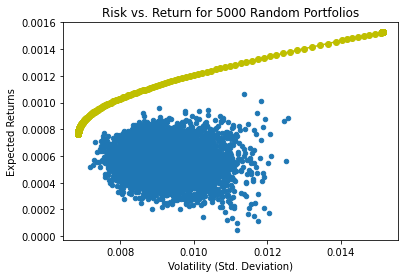

In [182]:
# Plot the 5000 random portfolios and the efficient frontier based on 500 optimal portfolios
rand_portfolios.plot.scatter(x='Volatility', y='Returns')
try:
    plt.plot(risks, returns, 'y-o')
except:
    pass
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Risk vs. Return for 5000 Random Portfolios')